## Import the Libraries and Data

https://towardsdatascience.com/linear-regression-models-4a3d14b8d368

In [1]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Since we are going to mae lot of visualization, let's set some visualization parameters in order to have same plots size
plt.rcParams['figure.figsize'] = [12,6]
sns.set_style('darkgrid')

In [174]:
house = pd.read_csv("data/Maison.csv")
# Since the columns are in french, in order to make them more readable, let's translate them into English
house = house.rename(index = str, columns = {'PRIX':'price','SUPERFICIE': 'area','CHAMBRES': 'rooms', 
                         'SDB': 'bathroom', 'ETAGES': 'floors','ALLEE': 'driveway',
                         'SALLEJEU':'game_room', 'CAVE': 'cellar', 
                         'GAZ': 'gas', 'AIR':'air', 'GARAGES': 'garage', 'SITUATION': 'situation'})

In [163]:
house.head()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
0,42000,5850,3,1,2,1,0,1,0,0,1,0
1,38500,4000,2,1,1,1,0,0,0,0,0,0
2,49500,3060,3,1,1,1,0,0,0,0,0,0
3,60500,6650,3,1,2,1,1,0,0,0,0,0
4,61000,6360,2,1,1,1,0,0,0,0,0,0


# Data Transformations & Analysis

In [5]:
house.describe()

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.858974,0.177656,0.349817,0.045788,0.316850,0.692308,0.234432
std,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.348367,0.382573,0.477349,0.209216,0.465675,0.861307,0.424032
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49125.000000,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,62000.000000,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


## Insights as per the data skeweness is there in the price and area column

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      546 non-null    int64
 1   area       546 non-null    int64
 2   rooms      546 non-null    int64
 3   bathroom   546 non-null    int64
 4   floors     546 non-null    int64
 5   driveway   546 non-null    int64
 6   game_room  546 non-null    int64
 7   cellar     546 non-null    int64
 8   gas        546 non-null    int64
 9   air        546 non-null    int64
 10  garage     546 non-null    int64
 11  situation  546 non-null    int64
dtypes: int64(12)
memory usage: 55.5+ KB


In [7]:
print(house.shape)
house.drop_duplicates(inplace = True)
print(house.shape)

(546, 12)
(545, 12)


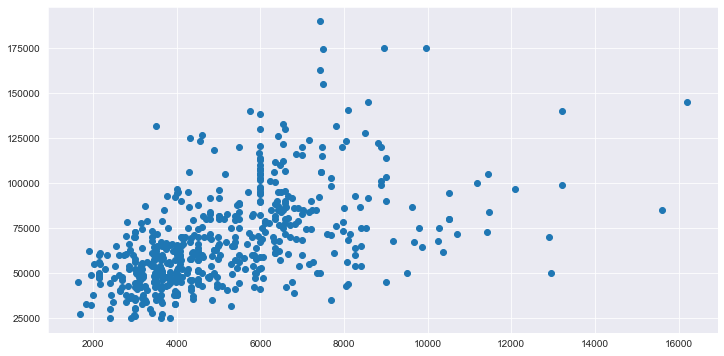

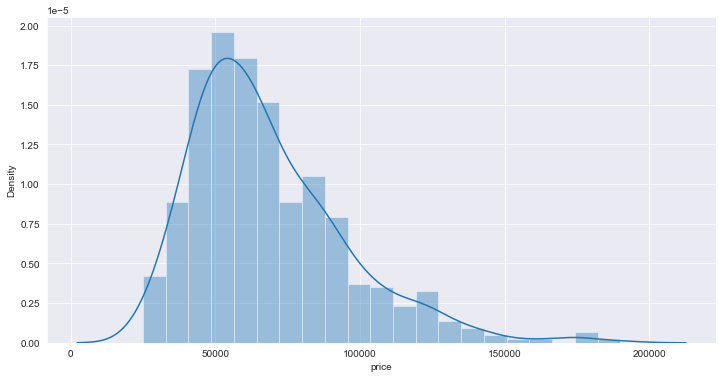

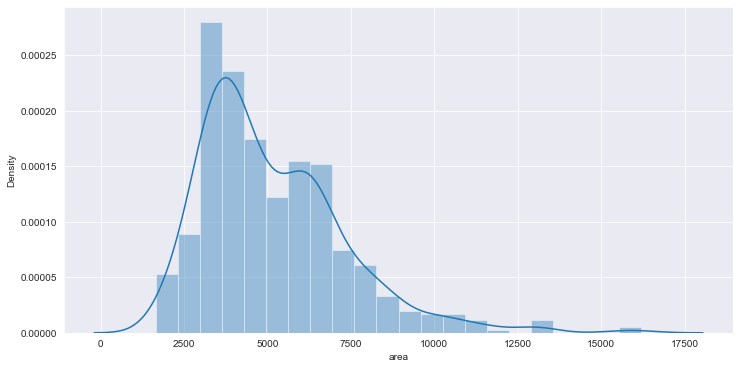

In [75]:
# Let's see ig we have a linear relation between price and area
#sns.palettes(house['area'], house['price'], palette = 'viridis')
plt.scatter(house['area'], house['price'])
plt.show()
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house['price'])
plt.show()
sns.distplot(house['area'])
plt.show()

### Removing the out liers

In [164]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1  # Consedering 1.5 for 3mu which is 99% ,Consider 1 for only 2 mu which is 95 %
        #Detect outlier and their indices
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 0)
    
    return multiple_outliers

In [175]:
# removing the out liers
print(house.shape)
house = house.drop(detect_outliers(house,["area"]),axis=0).reset_index(drop = True) # "price",
print(house.shape)

(546, 12)
(521, 12)


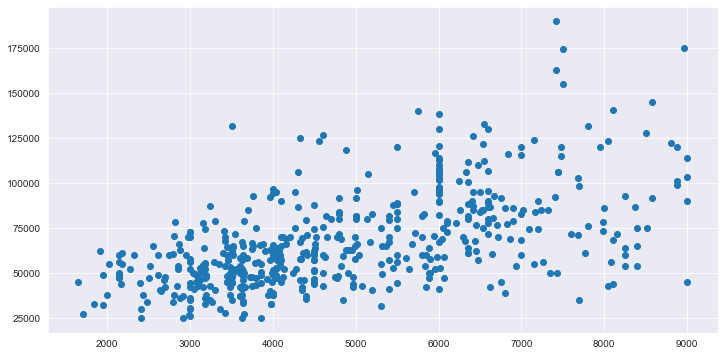

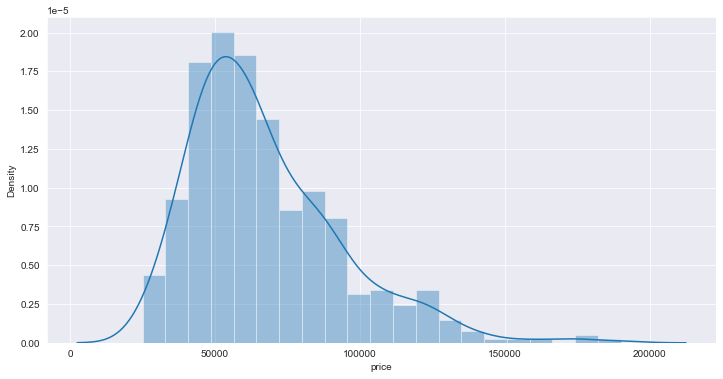

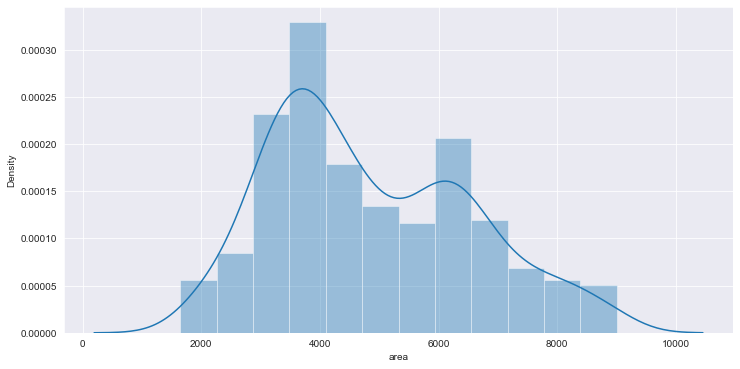

,price,area,rooms,bathroom,floors,driveway,game_room,cellar,gas,air,garage,situation
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,67234.725528,4855.631478,2.961612,1.284069,1.821497,0.852207,0.180422,0.347409,0.046065,0.320537,0.664107,0.220729
std,26268.720353,1694.899662,0.735412,0.499919,0.877496,0.355235,0.384908,0.476605,0.209828,0.467132,0.852845,0.415137
min,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48900.000000,3520.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,61000.000000,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,82000.000000,6040.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,190000.000000,9000.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


In [176]:
# after removing the out liers how does this look like
plt.scatter(house['area'], house['price'])
plt.show()
import warnings
warnings.filterwarnings('ignore')
sns.distplot(house['price'])
plt.show()
sns.distplot(house['area'])
plt.show()
house.describe()

### Finding the Coorilation to remove highly coorilated variables

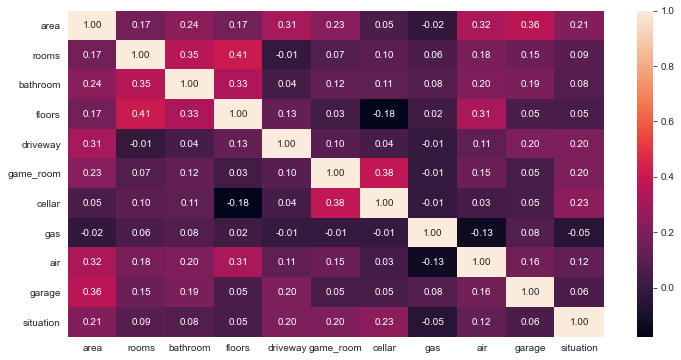

In [35]:
list1 = [i for i in house.columns if i != 'price']
sns.heatmap(house[list1].corr(), annot = True , fmt=".2f")
plt.show()
# as you see there are not much highly coorilated values

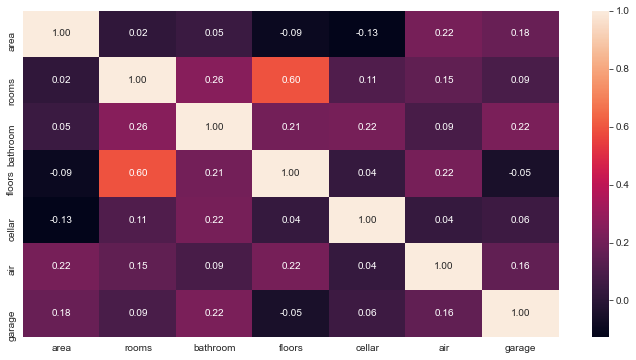

In [70]:
list1 = ["game_room", "driveway", "gas", "situation"]
house.drop(list1, axis=1, inplace=True)
list1 = [i for i in house.columns if i != 'price']
sns.heatmap(house[list1].corr(), annot = True , fmt=".2f")
plt.show()

In [47]:
# for i in house.columns:
#     print(f"-------------{i}-----------------")
#     print(house[i].describe())
#     print(f"---------------------------------")
# [i for i in house.columns if i != 'price']

['area',
 'rooms',
 'bathroom',
 'floors',
 'driveway',
 'game_room',
 'cellar',
 'gas',
 'air',
 'garage',
 'situation']

In [13]:
# Import the libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [177]:
# We now instatiate a Linear Regression object
lm = LinearRegression()
# let's do the split of the dataset
house.columns
X = house[['area', 'rooms', 'bathroom', 'floors', 'game_room',
       'cellar', 'air', 'garage', 'situation','gas',  'driveway']] # 
y = house['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=303) #303 
## Let's chec the head of some of these splits
X_test.head()
# We see that they are randomly selected

,area,rooms,bathroom,floors,game_room,cellar,air,garage,situation,gas,driveway
51,4100,4,1,1,0,1,0,0,0,0,0
483,8520,3,1,1,0,0,1,2,0,0,1
151,3600,3,1,2,0,0,0,1,0,0,0
375,8000,3,1,1,1,1,1,2,1,0,1
405,2880,3,1,2,0,0,0,0,1,0,1


In [15]:
import statsmodels.api as sm

In [178]:
X_endog = sm.add_constant(X_test)
res = sm.OLS(y_test, X_endog)
res.fit()
res.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     34.66
Date:                Sat, 27 Mar 2021   Prob (F-statistic):           3.80e-28
Time:                        10:15:42   Log-Likelihood:                -1131.2
No. Observations:                 105   AIC:                             2286.
Df Residuals:                      93   BIC:                             2318.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6610.6813   6480.227     -1.020      0.310   -1.95e+04    6257.766
area           3.4692      0.977      3.551      0.001       1.529       5.410
rooms       2687.6011   1655.168      1.624      0.108    -599.234    5974.437
bathroom    1.217e+04   2575.635      4.727      0.000    7059.410    1.73e+04
floors       1.13e+04   1632.915      6.920      0.000    8057.439    1.45e+04
game_room  -1468.8497   3383.593     -0.434      0.665   -8187.995    5250.296
cellar      6874.3132   3207.644      2.143      0.035     504.568    1.32e+04
air         7047.1830   3163.473      2.228      0.028     765.152    1.33e+04
garage      4009.7242   1594.691      2.514      0.014     842.984    7176.464
situation   6594.6473   3295.687      2.001      0.048      50.065    1.31e+04
gas         2.842e+04   5982.328      4.750      0.000    1.65e+04    4.03e+04
driveway    1714.4002   3916.777      0.438      0.663   -6063.542    9492.342
==============================================================================
Omnibus:                        2.920   Durbin-Watson:                   2.232
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                2.351
Skew:                           0.344   Prob(JB):                        0.309
Kurtosis:                       3.251   Cond. No.                     3.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
maxcv = None
maxi = None
mincv = None
mini = None
for i in range(1,400):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)    
    lr = LinearRegression().fit(X_train, y_train)
    scores = cross_val_score(lr,
                                 X_train,
                                 y_train,
                                 cv=5,
                                 scoring='r2')
    if maxcv == None:
        maxi = i
        maxcv = np.mean(scores)
    elif maxcv < np.mean(scores):
        maxcv = np.mean(scores)
        maxi = i
    if mincv == None:
        mincv = np.mean(scores)
        mini = i
    elif mincv > np.mean(scores): 
        mincv = np.mean(scores)
        mini = i
print(f""" MAX CV = {maxcv} at i = {maxi} \n 
           MIN CV = {mincv} at i = {mini} """)        
#     print("-------------------------")
#     get_cv_scores(lr)

 MAX CV = 0.708022272080955 at i = 621 
 
           MIN CV = 0.5909828221255625 at i = 727 
